In [ ]:
# feed forward neural network

# input = [-2 -1 0 1; -1 0 1 2]
# output = [-1.5 -1 1 1.5]

import numpy as np
import matplotlib.pyplot as plt

wi1 = 0.0651
wi2 = -0.6970
wo = -0.1342
bi = 0
bo = -0.5481

def tanh(x):
    return 2/(1+np.exp(-2*x))-1

alpha = 0.01
epochs = 500

x = np.array([[-2, -1, 0, 1], [-1, 0, 1, 2]])
t = np.array([-1.5, -1, 1, 1.5])

# if training too many times may cause overfitting
# if learning rate is too small, may cause slow learning

# imagine we have dad's movie rating and mom's movie rating
# we want to predict the child's movie rating in 4 movies
# input = [dad's rating, mom's rating]
# output = child's rating


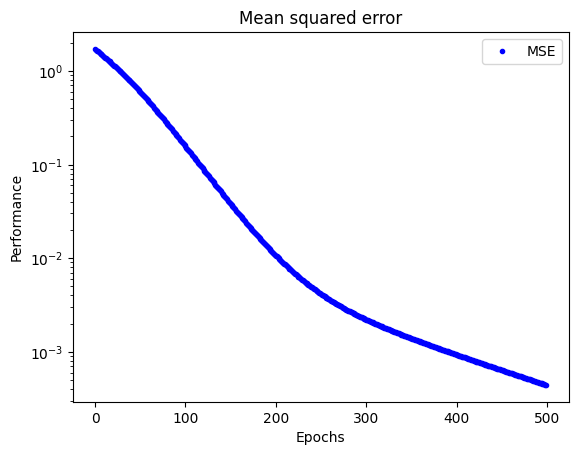

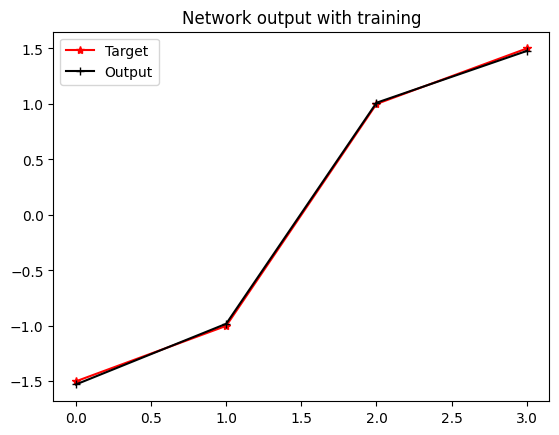

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Section 2.b. Inputs and targets
x = np.array([
    [-2, -1, 0, 1],
    [-1, 0, 1, 2]
])  # inputs
t = np.array([-1.5, -1, 1, 1.5])  # targets

# Section 2.c. Initial weight values
wi1, wi2 = 0.0651, -0.6970
wo, bi, bo = -0.1342, 0, -0.5481

# Section 3.f. Vary the previous values to test the influence in the BP algorithm
q = 500  # Number of epochs (example value)
s = x.shape[1]
alfa = 0.01  # Learning rate (example value)

ecm = np.zeros(q)
e = np.zeros(s)

# Training algorithm
for ep in range(q):
    dEdbo = dEdwo = dEdbi = dEdwi1 = dEdwi2 = 0
    zin = np.zeros(s)
    z = np.zeros(s)
    y = np.zeros(s)
    
    for k in range(s):
        zin[k] = wi1 * x[0, k] + wi2 * x[1, k] + bi
        z[k] = 2.0 / (1 + np.exp(-2 * zin[k])) - 1
        y[k] = wo * z[k] + bo  # output of the network
        e[k] = y[k] - t[k]  # computing the error
        ecm[ep] += (1.0 / s) * np.power(e[k], 2)  # computing the mean squared error

        # Section 2.d. Computing delta values
        dEdbo += alfa * (2.0 / s) * e[k]
        dEdwo += alfa * (2.0 / s) * e[k] * z[k]
        
        gradient_common_factor = alfa * (2.0 / s) * e[k] * wo * (4 * np.exp(-2 * zin[k]) / np.power(1 + np.exp(-2 * zin[k]), 2))
        dEdbi += gradient_common_factor
        dEdwi1 += gradient_common_factor * x[0, k]
        dEdwi2 += gradient_common_factor * x[1, k]

    # Updating network parameters
    wi1 -= dEdwi1
    wi2 -= dEdwi2
    bi -= dEdbi
    wo -= dEdwo
    bo -= dEdbo

# Section 3.c. Plotting the mean squared error
plt.semilogy(range(q), ecm, 'b.', label='MSE')
plt.title('Mean squared error')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Section 3.d. Plotting target vs. network output
plt.plot(range(s), t, 'r*-', label='Target')
plt.plot(range(s), y, 'k+-', label='Output')
plt.title('Network output with training')
plt.legend()
plt.show()


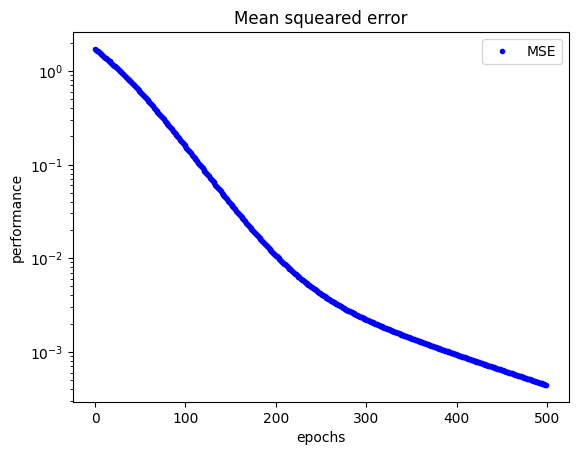

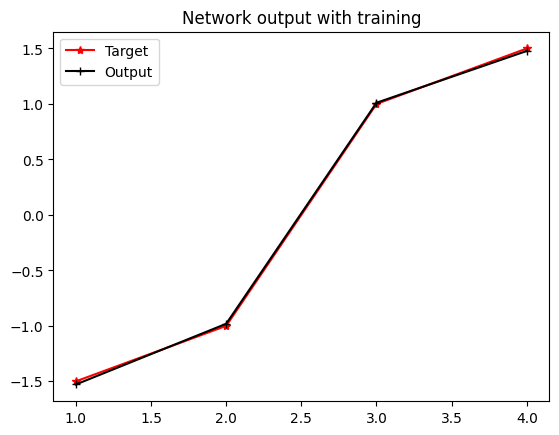

In [7]:
#Section 2.a. We use numpy arrays to represent the network
import numpy as np
import matplotlib.pyplot as plt

#Section 2.b. Inputs and targets
x = np.array([[-2,-1,0,1],[-1,0,1,2]]) #inputs
t = np.array([-1.5,-1,1,1.5]) #targets

#Section 2.c. Initial weight values
wi1=0.0651
wi2=-0.6970
wo=-0.1342
bi=0
bo=-0.5481
#Section 3.f. Vary the previous values to test the influence in the BP algorithm

#Section 2.e. Epoch and learning rate
q=500 #training epochs
alfa=0.01 #learning rate
#Section 3.e. Vary the previous values to test the influence in the BP algorithm

ecm=np.zeros(q)
e=np.zeros(q)
#Training algorithm
for ep in range(q):
    dEdbo=dEdwo=dEdbi=dEdwi1=dEdwi2=0
    zin=np.zeros(s)
    z=np.zeros(s)
    y=np.zeros(s)
    for k in range(s):
        zin[k]=wi1*x[0,k]+wi2*x[1,k]+bi
        z[k]= (2.0/(1+np.exp(-2*zin[k])))-1
        y[k]=wo*z[k]+bo #output of the network
        e[k]=y[k]-t[k] #computing the error
        ecm[ep]=ecm[ep]+(1.0/s)*np.power(e[k],2) #computing the mean squared error

        #Section 2.d. Computing delta values
        #Computing delta values (gradients) for the output layer, Eq. 4
        dEdbo=dEdbo+alfa*(2.0/s)*e[k]
        dEdwo=dEdwo+alfa*(2.0/s)*e[k]*z[k]
        #Computing delta values (gradients) for the hidden layer (using the derivative of the non-linear function), Eq. 5
        dEdbi=dEdbi+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/np.power(1+np.exp(-2*zin[k]),2))
        dEdwi1=dEdwi1+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/(np.power(1+np.exp(-2*zin[k]),2)))*x[0,k]
        dEdwi2=dEdwi2+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/(np.power(1+np.exp(-2*zin[k]),2)))*x[1,k];

    #Updating network parameters
    wi1=wi1-dEdwi1
    wi2=wi2-dEdwi2
    bi=bi-dEdbi
    wo=wo-dEdwo
    bo=bo-dEdbo

#Section 3.c. Plotting the mean squared error
plt.semilogy(range(q),ecm,'b.', label='MSE')
plt.title('Mean squeared error')
plt.xlabel('epochs')
plt.ylabel('performance')
plt.legend()
plt.show()

#Section 3.d.
i=np.arange(1,5)

plt.plot(i,t,'r*-',label='Target')
plt.plot(i,y,'k+-',label='Output')
plt.title('Network output with training')
plt.legend()
plt.show()

In [3]:
# using tensorflow to solve above problem

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

#Inputs and targets
x = np.array([[-2,-1,0,1],[-1,0,1,2]]).transpose() #inputs
t = np.array([-1.5,-1,1,1.5]).transpose() #targets

print(x)

model = Sequential()
model.add(Dense(1, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='linear'))

# use compile function to configure the learning process
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))
# model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# add batch_size to speed up training, batch size = 4 meaning 4 samples per batch
# use fit function to train the model
model.fit(x, t, batch_size = 4, epochs=500, verbose=1)


print(model.predict(x))

[[-2 -1]
 [-1  0]
 [ 0  1]
 [ 1  2]]
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 3.4523
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.3223
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.2017
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.0900
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.9869
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.8916
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8036
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7222
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.6469
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.5771
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.5123
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4520
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.3958
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3434
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


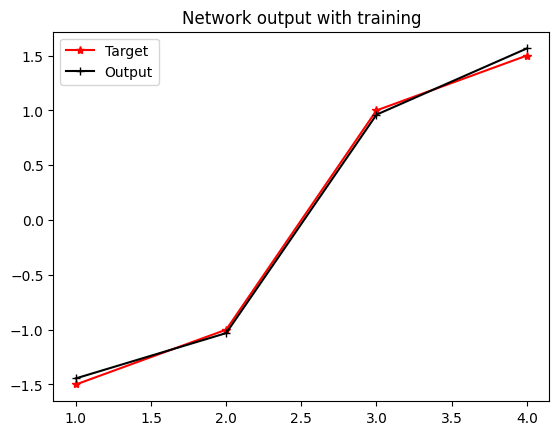

In [8]:
import matplotlib.pyplot as plt

yt = model.predict(x)
i = np.arange(1,5)
#Plotting network output with training
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,yt,'k+-',label='Output')
plt.title('Network output with training')
plt.legend()
plt.show()